In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importing both TensorFlow and its high level API - Keras.
import tensorflow as tf
from tensorflow import keras
# Setting the random seeds for repeatability
tf.random.set_seed(42)
np.random.seed(42)

Shape of X_train:  (60000, 28, 28)
Shape of X_test:  (10000, 28, 28)


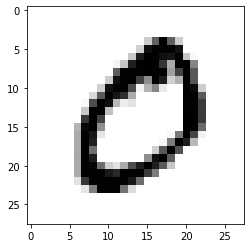

In [3]:
# Load MNIST database of handwritten digits
mnistDB = keras.datasets.mnist
# Training Dataset of 60,000 28x28 grayscale images of the 10 digits,
# along with a test set of 10,000 images.
(X_train, y_train),(X_test, y_test) = mnistDB.load_data()
print("Shape of X_train: ", X_train.shape)
# Shape of X_train: (60000, 28, 28)
print("Shape of X_test: ", X_test.shape)
# Shape of X_test: (10000, 28, 28)
# We can view the dataset with matplotlib
plt.imshow(X_train[1], cmap='binary')
plt.show()

In [4]:
# All 60000 training images are converted to 1D representation.
X_train = X_train.reshape((60000, 28*28))
# The grayscale image pixels are unsigned values between 0 and 255.
# These pixels need to be normalized to the range 0 to 1 for DNN.
# So, the entire training data is converted to 32-bit float and then
# divided with 255 to bring down the range to 0 to 1.
X_train = X_train.astype('float32')/255
# Similar operations are done to 10000 testing images.
# Flattening 2D image to 1D representation.
X_test = X_test.reshape((10000, 28*28))
# Scale pixel values to range 0 to 1.
X_test = X_test.astype('float32')/255
# Check again the shape of both training and testing dataset.
# Both are now 1D representations.
print("Shape of X_train: ", X_train.shape)
# Shape of X_train: (60000, 784)
print("Shape of X_test: ", X_test.shape)
# Shape of X_test: (10000, 784)

Shape of X_train:  (60000, 784)
Shape of X_test:  (10000, 784)


In [5]:
# Create neural network using keras API
# Sequential() does linear stacking of layers
dnnModel_MNIST = keras.models.Sequential()
# Hidden layer definitions.
# The input layer is defined together with
# first hidden layer by specifying the input_shape.
dnnModel_MNIST.add(keras.layers.Dense(50, activation="relu",
input_shape=X_train.shape[1:]))
dnnModel_MNIST.add(keras.layers.Dense(30, activation="relu"))
# Output layer
dnnModel_MNIST.add(keras.layers.Dense(10, activation="softmax"))
# Print the summary of network architecture
dnnModel_MNIST.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 41,090
Trainable params: 41,090
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Check the labels of the classes.
# Since, they are numeric labels, we can safely go ahead.
print(set(y_test))
# {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
# Compile the network model with relevant configurations.
# loss, optimizer and metrics are three important configurations.
dnnModel_MNIST.compile(loss='sparse_categorical_crossentropy',
optimizer='adam', metrics=['accuracy'])
# Train the network with 60000 training dataset
# with 10% of them used a validation set.
dnnModel_MNIST.fit(x=X_train, y=y_train, validation_split=0.1, epochs=10,
batch_size=16)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Epoch 1/10
3375/3375 [==============================] - 5s 1ms/step - loss: 0.2895 - accuracy: 0.9147 - val_loss: 0.1300 - val_accuracy: 0.9620
Epoch 2/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.1384 - accuracy: 0.9588 - val_loss: 0.1051 - val_accuracy: 0.9683
Epoch 3/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.1019 - accuracy: 0.9685 - val_loss: 0.1018 - val_accuracy: 0.9728
Epoch 4/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0852 - accuracy: 0.9732 - val_loss: 0.1010 - val_accuracy: 0.9707
Epoch 5/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0691 - accuracy: 0.9780 - val_loss: 0.0945 - val_accuracy: 0.9732
Epoch 6/10
3375/3375 [==============================] - 4s 1ms/step - loss: 0.0600 - accuracy: 0.9809 - val_loss: 0.1058 - val_accuracy: 0.9712
Epoch 7/10
3375/3375 [==============================] - 5s 1ms/step - loss: 0.0508 - accuracy: 0.9840 - v

In [8]:
# Evaluate the model with the 10000 testing image dataset.
# The function to evaluate the model returns two values,
# output loss, and the accuracy.
test_loss, test_accuracy = dnnModel_MNIST.evaluate(x=X_test, y=y_test)
# Print the output loss and accuracy.
# Depending on the computer used for evaluation,
# the results might slightly vary.
# The accuracy obtained can be close enough to what is obtained here
print(test_loss, test_accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1152 - accuracy: 0.9724
0.11522817611694336 0.9724000096321106
